In [29]:
import pandas
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset = pandas.read_csv('agaricus-lepiota.data')

data = dataset.values
labels = dataset.columns

label_encoder = LabelEncoder()
for i in range(len(labels)):
    data[:, i] = label_encoder.fit_transform(data[:, i])

data = data.astype(int)

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Vi gjør feature selection med utgangspunkt i at vi vil teste en spesifikk karakteristikk. Med 
# andre ord vi må velge y selv.

X = data[:, 1:]
y = data[:, 0]

skb = SelectKBest(chi2, k=5)
skb.fit(X, y)

print(labels[1:][skb.get_support()], skb.scores_[skb.get_support()])

Index(['bruises?', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object') [1194.27735201 1636.60683276 5957.76446881 1186.02922103 1950.61014644]


Original space shape: (8124, 22)
PCA space shape: (8124, 3)


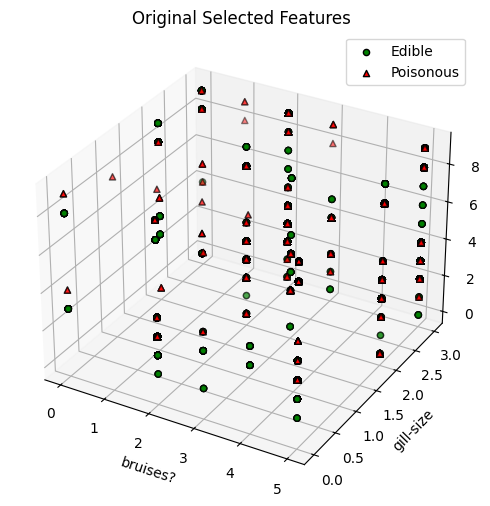

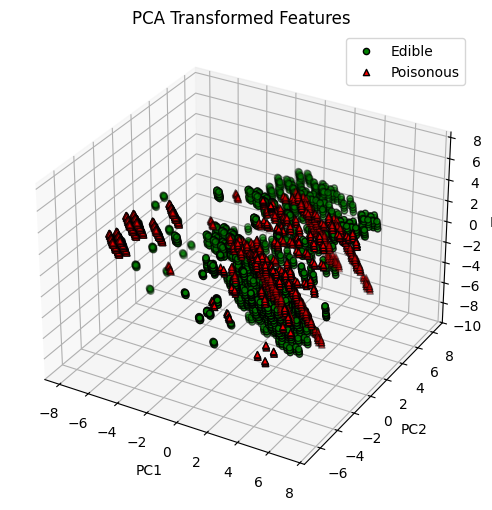

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
Xpca = pca.fit_transform(X)

print("Original space shape:", X.shape)
print("PCA space shape:", Xpca.shape)

# Plot original selected features
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

# Assign labels for plotting
class_names = ['Edible', 'Poisonous']
colors = ['green', 'red']
markers = ['o', '^']

for class_value in np.unique(y):
    ix = np.where(y == class_value)
    ax.scatter(X[ix, 0], X[ix, 1], X[ix, 2],
               c=colors[class_value], marker=markers[class_value],
               label=class_names[class_value], edgecolor='k')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title("Original Selected Features")
ax.legend()

plt.show()

# Plot PCA-transformed features
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = fig.add_subplot(111, projection='3d')

for class_value in np.unique(y):
    ix = np.where(y == class_value)
    ax2.scatter(Xpca[ix, 0], Xpca[ix, 1], Xpca[ix, 2],
                c=colors[class_value], marker=markers[class_value],
                label=class_names[class_value], edgecolor='k')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title("PCA Transformed Features")
ax2.legend()

plt.show()

In [82]:
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(dataset),columns = dataset.columns)

pca_amount = 1

pca = PCA(n_components=pca_amount)
pca.fit_transform(data_scaled)

FiveDpca = pd.DataFrame(pca.components_,columns=data_scaled.columns)

# Print the highest absolute values for each PC
for i in range(pca_amount):
    print(FiveDpca.iloc[i].abs().nlargest(5))


ring-type            0.402314
gill-color           0.380191
gill-size            0.369334
spore-print-color    0.336439
bruises?             0.326912
Name: 0, dtype: float64
